In [2]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [3]:
df1_1 = pd.read_excel('油画续费第一课（当期）.xlsx', sheet_name='第一节课出勤明细')
df1_2 = pd.read_excel('油画续费第一课（当期）.xlsx', sheet_name='当期的名片底表')
df1_3 = pd.read_excel('油画续费第一课（当期）.xlsx', sheet_name='直播间的聊天互动数据')
df1_4 = pd.read_excel('油画续费第一课（当期）.xlsx', sheet_name='转化数据-全款')
df1_5 = pd.read_excel('油画续费第一课（当期）.xlsx', sheet_name='转化数据-定金')

df2_1 = pd.read_excel('国画续费第一课（当期）.xlsx', sheet_name='第一节课出勤明细')
df2_2 = pd.read_excel('国画续费第一课（当期）.xlsx', sheet_name='当期的名片底表')
df2_3 = pd.read_excel('国画续费第一课（当期）.xlsx', sheet_name='直播间的聊天互动数据')
df2_4 = pd.read_excel('国画续费第一课（当期）.xlsx', sheet_name='转化数据-全款')
df2_5 = pd.read_excel('国画续费第一课（当期）.xlsx', sheet_name='转化数据-定金')

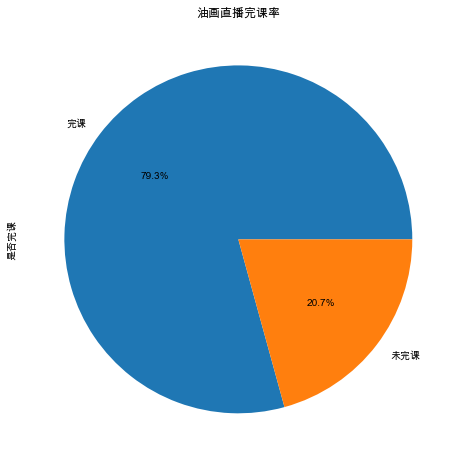

In [4]:
plt.figure( figsize=(8, 8))
df1_1['是否完课'].value_counts().plot( kind = 'pie', autopct='%.1f%%')
plt.title('油画直播完课率')
plt.show()

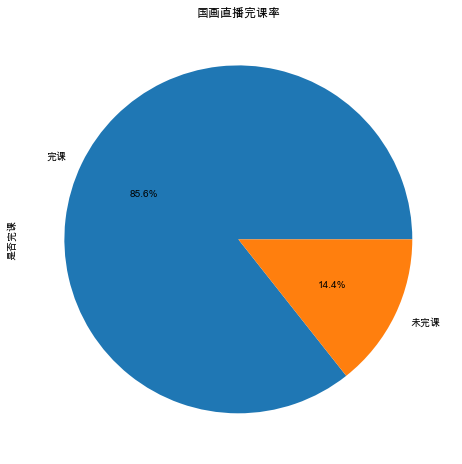

In [5]:
plt.figure( figsize=(8, 8))
df2_1['是否完课'].value_counts().plot( kind = 'pie', autopct='%.1f%%')
plt.title('国画直播完课率')
plt.show()

In [6]:
df1_4['学员id'].isin(df1_1[df1_1['是否完课'] == '完课']['学员id']).sum() / df1_4['学员id'].shape[0]

0.8383233532934131

In [7]:
df2_4['学员id'].isin(df2_1[df2_1['是否完课'] == '完课']['学员id']).sum() / df2_4['学员id'].shape[0]

0.8374455732946299

In [8]:
df1_5['大鱼学员ID'].isin(df1_1[df1_1['是否完课'] == '完课']['学员id']).sum() / df1_5['大鱼学员ID'].shape[0]

0.12

In [9]:
df2_5['大鱼学员ID'].isin(df2_1[df2_1['是否完课'] == '完课']['学员id']).sum() / df2_5['大鱼学员ID'].shape[0]

0.02866779089376054

In [10]:
df1_4['学员id'].isin(df1_1[df1_1['是否完课'] == '未完课']['学员id']).sum() / df1_4['学员id'].shape[0]

0.059880239520958084

In [11]:
df2_4['学员id'].isin(df2_1[df2_1['是否完课'] == '未完课']['学员id']).sum() / df2_4['学员id'].shape[0]

0.04499274310595065

In [12]:
df1_5['大鱼学员ID'].isin(df1_1[df1_1['是否完课'] == '未完课']['学员id']).sum() / df1_5['大鱼学员ID'].shape[0]

0.02

In [13]:
df2_5['大鱼学员ID'].isin(df2_1[df2_1['是否完课'] == '未完课']['学员id']).sum() / df2_5['大鱼学员ID'].shape[0]

0.0016863406408094434

In [14]:
oil = df1_3[df1_3['message_type'] == 1].shape[0] / df1_3.shape[0]
chinese = df2_3[df2_3['message_type'] == 1].shape[0] / df2_3.shape[0]

In [15]:
oil, chinese

(0.24239417989417988, 0.21404453734223008)

In [16]:
df1_3[df1_3['user_name'].str.contains('助教')].shape[0]/ df1_3.shape[0]

0.0036375661375661374

In [17]:
df2_3[df2_3['user_name'].str.contains('助教')].shape[0]/ df2_3.shape[0]

0.0010049039311841787

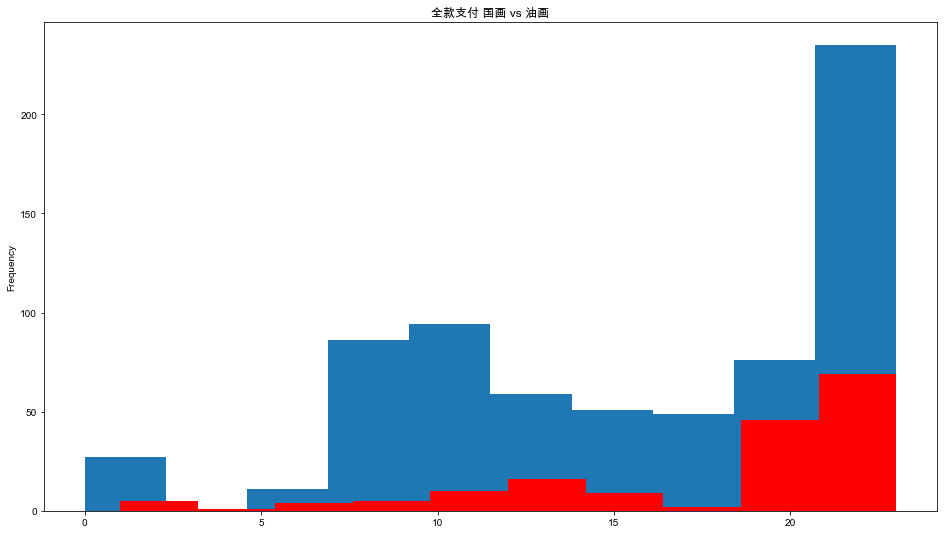

In [18]:
df1_4['支付日期'] = pd.to_datetime(df1_4['支付日期'])
df2_4['支付日期'] = pd.to_datetime(df2_4['报名时间'])


df2_4['Hour'] = df2_4['报名时间'].dt.hour
df1_4['Hour'] = df1_4['支付日期'].dt.hour

plt.figure( figsize=(16,9))

df2_4['Hour'].plot(kind= 'hist')
df1_4['Hour'].plot(kind= 'hist', color= 'red')

plt.title('全款支付 国画 vs 油画')

plt.show()

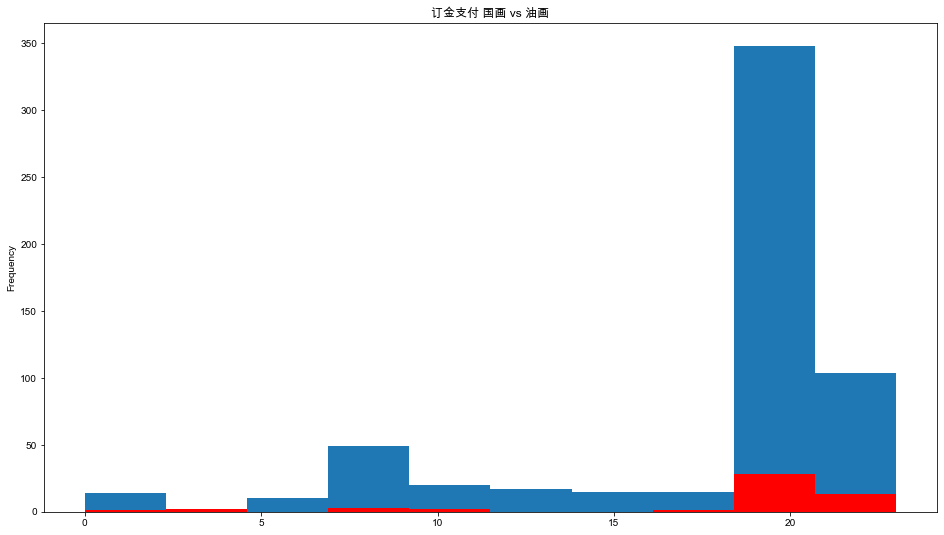

In [19]:
df1_5['支付日期'] = pd.to_datetime(df1_5['支付时间'])
df2_5['支付日期'] = pd.to_datetime(df2_5['支付时间'])


df2_5['Hour'] = df2_5['支付日期'].dt.hour
df1_5['Hour'] = df1_5['支付日期'].dt.hour

plt.figure( figsize=(16,9))

df2_5['Hour'].plot(kind= 'hist')
df1_5['Hour'].plot(kind= 'hist', color= 'red')

plt.title('订金支付 国画 vs 油画')

plt.show()

In [23]:
data = pd.DataFrame()

total =  [df1_1.shape[0], df2_1.shape[0]]
in_hour = [df1_1.loc[(df1_1['durationStr'] < 60)].shape[0], df2_1.loc[(df2_1['durationStr'] < 60)].shape[0]]
over_hour = [df1_1.loc[(df1_1['durationStr'] > 60)].shape[0], df2_1.loc[(df2_1['durationStr'] > 60)].shape[0]]
pay = [df1_4.shape[0] + df1_5.shape[0], df2_4.shape[0] + df2_5.shape[0]]

data['总人数'] = total
data['1小时以内'] = in_hour
data['1小时以上'] = over_hour
data['付款人数'] = pay
data




,总人数,1小时以内,1小时以上,付款人数
0,661,191,470,217
1,3895,817,3078,1282


In [31]:
import plotly.express as px

stages = ["总人数", "1小时以内", "1小时以上", "付款人数"]
df_mtl = pd.DataFrame(dict(number=[df1_1.shape[0] / df1_1.shape[0],
                                   df1_1.loc[(df1_1['durationStr'] < 60)].shape[0]/ df1_1.shape[0], 
                                   df1_1.loc[(df1_1['durationStr'] > 60)].shape[0]/ df1_1.shape[0], 
                                   (df1_4.shape[0] + df1_5.shape[0]) / df1_1.shape[0]
                                   ], 
                           stage=stages))
df_mtl['office'] = '油画'
df_toronto = pd.DataFrame(dict(number=[df2_1.shape[0]/ df2_1.shape[0],
                                   df2_1.loc[(df2_1['durationStr'] < 60)].shape[0] / df2_1.shape[0], 
                                   df2_1.loc[(df2_1['durationStr'] > 60)].shape[0] / df2_1.shape[0], 
                                   (df2_4.shape[0] + df2_5.shape[0]) / df2_1.shape[0]
                                   ], 
                               stage=stages))
df_toronto['office'] = '国画'
df = pd.concat([df_mtl, df_toronto], axis=0)
fig = px.funnel(df, x='number', y='stage', color='office')
fig.show()

In [29]:
df_toronto

,number,stage,office
0,3895,总人数,Toronto
1,817,1小时以内,Toronto
2,3078,1小时以上,Toronto
3,1282,付款人数,Toronto
